In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import statsmodels.api as sm 
from sklearn.metrics import mean_squared_error as mse
from math import sqrt 
from statsmodels.tsa.ar_model import AR 

In [2]:
#Q1 I guess
f = pd.read_csv("SoilForce.csv")
cols = ["Date","Force"]
d = f["Date"].values
t = f["Force"].values
tp1 = t[1:len(t)]   #present day temperature
tp2 = t[0:len(t)-1]   #previous day temperature
print("Correlation between previous day and today: ",np.corrcoef(tp1,tp2)[0,1])

Correlation between previous day and today:  0.8128582687124885


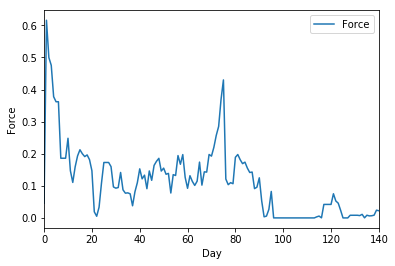

In [11]:
f.plot()
plt.xlabel("Day")
plt.ylabel("Force")
plt.show()

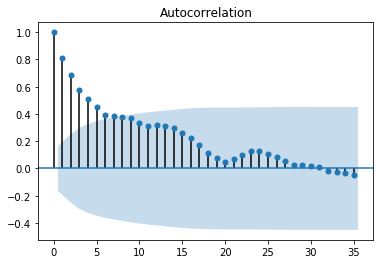

In [10]:
#Q2 I guess
sm.graphics.tsa.plot_acf(t, lags = 35)
plt.show()

In [5]:
#Q3 I guess
ftr = f[0:int(len(f)/2)]
ft = f[int(len(f)/2):]

ft1 = ft[1:]
ft2 = ft[0:-1]

print("Persistance model RMSE test: ",sqrt(mse(ft1["Force"].values,ft2["Force"].values)))

ft1 = ftr[1:]
ft2 = ftr[0:-1]

print("Persistance model RMSE train: ",sqrt(mse(ft1["Force"].values,ft2["Force"].values)))

Persistance model RMSE test:  0.04533667200008021
Persistance model RMSE train:  0.08421178394743038


In [12]:
#Q4 I guess
train, test = ftr,ft
train = train["Force"].values
test = test["Force"].values

model = AR(train)
model_fit = model.fit()
print('Lag: ', model_fit.k_ar)
print('\nCoefficients: \n', model_fit.params)

predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

error = sqrt(mse(test, predictions))
print('\nTest RMSE: ',error)

Lag:  11

Coefficients: 
 [ 0.06896423  0.71896652 -0.00853649 -0.46401176  0.40799727 -0.28213358
 -0.11211714  0.21027213 -0.06704208 -0.05755324  0.09355744  0.01939667]

Test RMSE:  0.11335438023048736
